In [1]:
import os
import pandas as pd
import numpy as np
import json
import folium
import branca.colormap as cm
from IPython.display import display

In [97]:
%matplotlib inline

First of all, plot_choropleth_map method is implemented. It takes dataframe, columns, location, zoom_start, json_data, json_key, json_object_path, legend as parameters. dataframe holds the data, columns are the name of columns to use as a list where first elements is name of country in dataframe and second element is column that holds the value of unemployment, location is starting position of folium map as list of longitude and latitude, zoom_start is starting zoom level of folium map, json_data is topojson data to be used on top of folium map, json_key is label in the json file for countries, json_object_path is path of countries in json file, legend is legend displayed on the folium map. Note that countries which data is not available are displayed as black.

In [2]:
def plot_choropleth_map(dataframe, columns, location, zoom_start, json_data, json_key, json_object_path, legend):
    my_map = folium.Map(location = location, zoom_start = zoom_start, tiles='cartodbpositron')
    colormap = cm.LinearColormap(['green','yellow','orange','red'], vmin=dataframe[columns[1]].min(), vmax=dataframe[columns[1]].max())
    def style_function(feature):
        d = dataframe.loc[dataframe[columns[0]] == feature['properties'][json_key]]
        return {
            'fillOpacity': 0.8,
            'weight': 1,
            'fillColor': '#black' if d.size == 0 else colormap(d[columns[1]].tolist()[0])
        }
        
    # Add color overlay based on json data
    folium.TopoJson(json_data,
                    object_path = json_object_path,
                    style_function = style_function).add_to(my_map)
    # Add legend and caption
    colormap.caption = legend
    my_map.add_child(colormap)
    return my_map

# 1

These are parameters for loading and plotting data for Europe.

In [4]:
euro_path_1 = "euro_1.csv"
euro_path_2 = "euro_2.csv"
euro_coordinates = [55,11]
euro_zoom = 3
euro_json_path = "europe.topojson.json"
euro_json_data = json.load(open(euro_json_path))
euro_json_key = 'NAME'
euro_json_object_path = 'objects.europe'

Load data.

Note that, there are many different statistics for Europe in Eurostat website. Depending on definition of unemployment, one can be interested in different data. 

First, we wanted to use statistics for employment rate, in other words ratio of employed people among active population. We used the following dataset: [Employment rates by sex, age and citizenship](http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=lfsq_ergan&lang=en). It contains employment rates for various European countries from 2015Q1 to 2017Q2. Using the website we downloaded data into .csv format and then processed it using pandas.

Second, we wanted to use statistics for unemployment rate directly, in other words ratio of people who are not employed and looking for job among active population. We used the following dataset: [Unemployment rates by sex, age and nationality](http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=lfsa_urgan&lang=en). It contains unemployment rates for various European countries from 2007 to 2016. Using the website we downloaded data into .csv format and then processed it using pandas.

As it is explained in the homework, there are various definitions of unemployment and depending on which data is used the results might differ. In this part we use 2 different data as explained above, the first one is employment ratio (number of employed people divided by number of employable population, where employable population consists of people who do not want to work, do not look for a job, housewives etc as well) and the second one is unemployment ratio (number of umemployed people divided by number of people already work or looking for a job). Because of difference in definitions, the results dramatically differ. For example, if for example in Turkey women tend to not work, unemployment ratio would not be that high for women; however, since they are not employed as they do not want to work but they are employable (i.e. no reason not to work except their will) employment rate will be very low, so 1-employment rate would be very high.

In [5]:
euro_1_data = pd.read_csv(euro_path_1, header=0)
euro_2_data = pd.read_csv(euro_path_2, header=0)

Show sample of data using head().

In [6]:
euro_1_data.head(10)

,TIME,GEO,SEX,AGE,CITIZEN,UNIT,Value,Flag and Footnotes
0,2015Q1,European Union (28 countries),Total,From 15 to 64 years,Total,Percentage,64.7,NaN
1,2015Q1,European Union (28 countries),Males,From 15 to 64 years,Total,Percentage,69.8,NaN
2,2015Q1,European Union (28 countries),Females,From 15 to 64 years,Total,Percentage,59.7,NaN
3,2015Q1,European Union (27 countries),Total,From 15 to 64 years,Total,Percentage,64.8,NaN
4,2015Q1,European Union (27 countries),Males,From 15 to 64 years,Total,Percentage,69.9,NaN
5,2015Q1,European Union (27 countries),Females,From 15 to 64 years,Total,Percentage,59.8,NaN
6,2015Q1,European Union (15 countries),Total,From 15 to 64 years,Total,Percentage,65.4,NaN
7,2015Q1,European Union (15 countries),Males,From 15 to 64 years,Total,Percentage,70.3,NaN
8,2015Q1,European Union (15 countries),Females,From 15 to 64 years,Total,Percentage,60.6,NaN
9,2015Q1,Euro area (19 countries),Total,From 15 to 64 years,Total,Percentage,63.7,NaN


In [7]:
euro_2_data.head(10)

,TIME,GEO,SEX,AGE,CITIZEN,UNIT,Value,Flag and Footnotes
0,2007,European Union (28 countries),Total,From 15 to 74 years,Total,Percentage,7.1,NaN
1,2007,European Union (28 countries),Males,From 15 to 74 years,Total,Percentage,6.6,NaN
2,2007,European Union (28 countries),Females,From 15 to 74 years,Total,Percentage,7.8,NaN
3,2007,European Union (27 countries),Total,From 15 to 74 years,Total,Percentage,7.1,NaN
4,2007,European Union (27 countries),Males,From 15 to 74 years,Total,Percentage,6.6,NaN
5,2007,European Union (27 countries),Females,From 15 to 74 years,Total,Percentage,7.8,NaN
6,2007,European Union (15 countries),Total,From 15 to 74 years,Total,Percentage,7.0,NaN
7,2007,European Union (15 countries),Males,From 15 to 74 years,Total,Percentage,6.3,NaN
8,2007,European Union (15 countries),Females,From 15 to 74 years,Total,Percentage,7.7,NaN
9,2007,Euro area (19 countries),Total,From 15 to 74 years,Total,Percentage,7.4,NaN


Show columns and datatypes.

In [8]:
euro_1_data.dtypes

TIME                   object
GEO                    object
SEX                    object
AGE                    object
CITIZEN                object
UNIT                   object
Value                 float64
Flag and Footnotes     object
dtype: object

In [9]:
euro_2_data.dtypes

TIME                    int64
GEO                    object
SEX                    object
AGE                    object
CITIZEN                object
UNIT                   object
Value                 float64
Flag and Footnotes     object
dtype: object

Unique values in each column.

In [10]:
for i in euro_1_data.columns:
    print("For column {}".format(i))
    print(euro_1_data[i].unique())

For column TIME
['2015Q1' '2015Q2' '2015Q3' '2015Q4' '2016Q1' '2016Q2' '2016Q3' '2016Q4'
 '2017Q1' '2017Q2']
For column GEO
['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (15 countries)' 'Euro area (19 countries)'
 'Euro area (18 countries)' 'Euro area (17 countries)' 'Belgium' 'Bulgaria'
 'Czech Republic' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland' 'Portugal'
 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'United Kingdom'
 'Iceland' 'Norway' 'Switzerland'
 'Former Yugoslav Republic of Macedonia, the' 'Turkey']
For column SEX
['Total' 'Males' 'Females']
For column AGE
['From 15 to 64 years']
For column CITIZEN
['Total']
For column UNIT
['Percentage']
For column Value
[ 64.7  69.8  59.7  64.8  69.9  59.8  65.4  70.3  60.6  63.7  68.7  58.8
  58.7  61.9  65.7  58.1  61.   6

In [11]:
for i in euro_2_data.columns:
    print("For column {}".format(i))
    print(euro_2_data[i].unique())

For column TIME
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
For column GEO
['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (15 countries)' 'Euro area (19 countries)'
 'Euro area (18 countries)' 'Euro area (17 countries)' 'Belgium' 'Bulgaria'
 'Czech Republic' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland' 'Portugal'
 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'United Kingdom'
 'Iceland' 'Norway' 'Switzerland'
 'Former Yugoslav Republic of Macedonia, the' 'Turkey']
For column SEX
['Total' 'Males' 'Females']
For column AGE
['From 15 to 74 years']
For column CITIZEN
['Total']
For column UNIT
['Percentage']
For column Value
[  7.1   6.6   7.8   7.    6.3   7.7   7.4   8.4   8.5   7.5   6.7   6.9
   6.5   7.3   5.3   4.2   3.8   3.4   8.7   8.6   8.8   4.6   5.4   4.7
 

Data cleaning steps:

Drop unnecessary columns ("AGE", "CITIZEN", "UNIT", "Flag and Footnotes")

Drop rows where GEO is not a country (i.e. "European Union (28 countries)", "Euro area (19 countries)" etc.)

Drop rows where TIME is not the most recent (drop rows if TIME is not equal to '2017Q2', wihch means 2nd quarter of 2017)

Set value to, 100 - value to get unemployment rate instead of employment rate.

In [12]:
# drop unnecessary columns
euro_1_data.drop(["AGE", "CITIZEN", "UNIT", "Flag and Footnotes"], axis=1, inplace=True)
# drop row, if not valid country (i.e. EU (28 countries))
euro_1_data = euro_1_data[euro_1_data["GEO"].apply(lambda x: False if "countries" in x else True)]
# drop rows, if not most recent data
euro_1_data = euro_1_data[euro_1_data["TIME"] == euro_1_data["TIME"].max()]
# find unemployment percentage
euro_1_data["Value"] = 100 - euro_1_data["Value"]

In [13]:
# drop unnecessary columns
euro_2_data.drop(["AGE", "CITIZEN", "UNIT", "Flag and Footnotes"], axis=1, inplace=True)
# drop row, if not valid country (i.e. EU (28 countries))
euro_2_data = euro_2_data[euro_2_data["GEO"].apply(lambda x: False if "countries" in x else True)]
# drop rows, if not most recent data
euro_2_data = euro_2_data[euro_2_data["TIME"] == euro_2_data["TIME"].max()]

List country names in topojson file for Europe.

In [14]:
euro_json_geo = []
for i in euro_json_data['objects']['europe']['geometries']:
    euro_json_geo.append(i['properties']['NAME'])
    
print(euro_json_geo)

['Azerbaijan', 'Albania', 'Armenia', 'Bosnia and Herzegovina', 'Bulgaria', 'Cyprus', 'Denmark', 'Ireland', 'Estonia', 'Austria', 'Czech Republic', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Croatia', 'Hungary', 'Iceland', 'Israel', 'Italy', 'Latvia', 'Belarus', 'Lithuania', 'Slovakia', 'Liechtenstein', 'The former Yugoslav Republic of Macedonia', 'Malta', 'Belgium', 'Faroe Islands', 'Andorra', 'Luxembourg', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Republic of Moldova', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'Ukraine', 'San Marino', 'Serbia', 'Holy See (Vatican City)', 'Russia']


Find rows where GEO column is not one of countries in topojson file.

In [15]:
euro_1_data.loc[ [i not in euro_json_geo for i in euro_1_data["GEO"]], "GEO" ]

1083    Germany (until 1990 former territory of the FRG)
1084    Germany (until 1990 former territory of the FRG)
1085    Germany (until 1990 former territory of the FRG)
1164          Former Yugoslav Republic of Macedonia, the
1165          Former Yugoslav Republic of Macedonia, the
1166          Former Yugoslav Republic of Macedonia, the
Name: GEO, dtype: object

In [16]:
euro_2_data.loc[ [i not in euro_json_geo for i in euro_1_data["GEO"]], "GEO" ]

1083    Germany (until 1990 former territory of the FRG)
1084    Germany (until 1990 former territory of the FRG)
1085    Germany (until 1990 former territory of the FRG)
1164          Former Yugoslav Republic of Macedonia, the
1165          Former Yugoslav Republic of Macedonia, the
1166          Former Yugoslav Republic of Macedonia, the
Name: GEO, dtype: object

Adjust GEO column of these rows to match them what we have in topojson file as country names.

In [17]:
euro_1_data.GEO.replace({"Germany (until 1990 former territory of the FRG)": "Germany", "Former Yugoslav Republic of Macedonia, the": "The former Yugoslav Republic of Macedonia"}, inplace=True)

In [18]:
euro_2_data.GEO.replace({"Germany (until 1990 former territory of the FRG)": "Germany", "Former Yugoslav Republic of Macedonia, the": "The former Yugoslav Republic of Macedonia"}, inplace=True)

Show sample of finalized dataframes for data 1 and data 2.

In [20]:
euro_1_data.head(20)

,TIME,GEO,SEX,Value
1071,2017Q2,Belgium,Total,37.2
1072,2017Q2,Belgium,Males,32.9
1073,2017Q2,Belgium,Females,41.6
1074,2017Q2,Bulgaria,Total,32.8
1075,2017Q2,Bulgaria,Males,29.5
1076,2017Q2,Bulgaria,Females,36.1
1077,2017Q2,Czech Republic,Total,26.7
1078,2017Q2,Czech Republic,Males,19.4
1079,2017Q2,Czech Republic,Females,34.3
1080,2017Q2,Denmark,Total,25.9


In [21]:
euro_2_data.head(20)

,TIME,GEO,SEX,Value
1071,2016,Belgium,Total,7.8
1072,2016,Belgium,Males,8.1
1073,2016,Belgium,Females,7.6
1074,2016,Bulgaria,Total,7.6
1075,2016,Bulgaria,Males,8.1
1076,2016,Bulgaria,Females,7.0
1077,2016,Czech Republic,Total,4.0
1078,2016,Czech Republic,Males,3.4
1079,2016,Czech Republic,Females,4.7
1080,2016,Denmark,Total,6.2


Generate maps for total, male and female unemployment rates using data 1 and data 2.

In [246]:
euro_1_map = plot_choropleth_map(euro_1_data[euro_1_data["SEX"]=="Total"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country in %")
euro_1_map_male = plot_choropleth_map(euro_1_data[euro_1_data["SEX"]=="Males"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country for Males in %")
euro_1_map_female = plot_choropleth_map(euro_1_data[euro_1_data["SEX"]=="Females"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country for Females in %")

In [23]:
euro_2_map = plot_choropleth_map(euro_2_data[euro_2_data["SEX"]=="Total"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country in %")
euro_2_map_male = plot_choropleth_map(euro_2_data[euro_2_data["SEX"]=="Males"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country for Males in %")
euro_2_map_female = plot_choropleth_map(euro_2_data[euro_2_data["SEX"]=="Females"], ["GEO", "Value"], euro_coordinates, euro_zoom, euro_json_data, euro_json_key, euro_json_object_path, "Unemployment per Country for Females in %")

Display generated maps for total, male and female unemployment rates in Europe per country using (100 - employment rate)% (data1). Countries without data are displayed as black.

In [24]:
euro_1_map

In [25]:
euro_1_map_male

In [26]:
euro_1_map_female

Display generated maps for total, male and female unemployment rates in Europe per country using (unemployment rate)% (data2). Countries without data are displayed as black.

In [248]:
euro_2_map

In [249]:
euro_2_map_male

In [250]:
euro_2_map_female

Among all population, Switzerland has second smallest unemployment rate according to data 1 and seventh smallest unemployment rate according to data 2.

In [239]:
euro_1_data.loc[euro_1_data["SEX"]=="Total"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1155,Iceland,12.2
1161,Switzerland,20.2
1149,Sweden,22.9
1125,Netherlands,24.3
1083,Germany,25.2
1158,Norway,25.8
1080,Denmark,25.9
1152,United Kingdom,25.9
1077,Czech Republic,26.7
1086,Estonia,26.8


In [240]:
euro_2_data.loc[euro_2_data["SEX"]=="Total"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1155,Iceland,3.0
1077,Czech Republic,4.0
1083,Germany,4.1
1158,Norway,4.7
1122,Malta,4.7
1152,United Kingdom,4.8
1161,Switzerland,5.0
1119,Hungary,5.1
1137,Romania,5.9
1128,Austria,6.0


Among male population, Switzerland has second smallest unemployment rate according to data 1 and fifth smallest unemployment rate according to data 2.

In [241]:
euro_1_data.loc[euro_1_data["SEX"]=="Males"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1156,Iceland,9.3
1162,Switzerland,15.4
1078,Czech Republic,19.4
1126,Netherlands,19.8
1123,Malta,21.1
1084,Germany,21.4
1153,United Kingdom,21.4
1150,Sweden,21.5
1081,Denmark,23.1
1087,Estonia,23.3


In [242]:
euro_2_data.loc[euro_2_data["SEX"]=="Males"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1156,Iceland,2.9
1078,Czech Republic,3.4
1123,Malta,4.4
1084,Germany,4.5
1162,Switzerland,4.9
1153,United Kingdom,5.0
1120,Hungary,5.1
1159,Norway,5.4
1126,Netherlands,5.6
1081,Denmark,5.8


Among female population, Switzerland has third smallest unemployment rate according to data 1 and seventh smallest unemployment rate according to data 2.

In [244]:
euro_1_data.loc[euro_1_data["SEX"]=="Females"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1157,Iceland,15.2
1151,Sweden,24.4
1163,Switzerland,25.2
1160,Norway,27.4
1082,Denmark,28.7
1127,Netherlands,28.8
1085,Germany,29.0
1115,Lithuania,29.3
1088,Estonia,30.2
1154,United Kingdom,30.4


In [245]:
euro_2_data.loc[euro_2_data["SEX"]=="Females"].sort_values("Value")[["GEO", "Value"]]

,GEO,Value
1157,Iceland,3.0
1085,Germany,3.8
1160,Norway,3.9
1079,Czech Republic,4.7
1154,United Kingdom,4.7
1139,Romania,5.0
1163,Switzerland,5.0
1121,Hungary,5.1
1124,Malta,5.2
1130,Austria,5.6


Examining results, one can say that Switzerland has one of the highest employment rate (ratio of population which is employed) in Europe (according to data 1) and one of the best countries in Europe in terms of lower unemployment rates (according to data 2), although its performance is better for employment rates than unemployment rates.

# 2

These are parameters for loading and plotting data for Switzerland.

In [294]:
ch_total_path = "ch_total.xlsx"
ch_sex_path = "ch_sex.xlsx"
ch_jobseeker_path = "ch_jobseeker.xlsx"
ch_nationality_path = "ch_nationality.csv"
ch_coordinates = [46.8131873,8.1637852]
ch_zoom = 8
ch_json_path = "ch-cantons.topojson.json"
ch_json_data = json.load(open(ch_json_path))
ch_json_key = 'name'
ch_json_object_path = 'objects.cantons'

Load data. By examining structure of .xlsx beforehand, we know following: how many rows to skip initially, what is header, which columns are meningful for us.
Note that, there are many different statistics for Switzerland in Amstat website. Depending on definition of unemployment, one can be interested in different data.

First, we wanted to use statistics for total unemployment rate, in other words ratio of unemployed people among active population. We used the most recent data downloaded from Amstat website in .xlsx format, and then processed it using pandas.

Second, we wanted to use statistics for unemployment rate by sex, in other words ratio of unemployed people among active population by sex category. We used the most recent data downloaded from Amstat website in .xlsx format, and then processed it using pandas.

Thirdly, we wanted to see what is changed if we use different definiton of unemployment, namely ratio of jobseekers (people who are registered as jobseekers, some are unemployed and some are employed). We used the most recent data downloaded from Amstat website in .xlsx format, and then processed it using pandas.

In [295]:
ch_total_data = pd.read_excel(ch_total_path, skiprows=4, header=None, usecols=np.array([0,2]))
ch_sex_data = pd.read_excel(ch_sex_path, skiprows=4, header=None, usecols=np.array([0,1,3]))
ch_jobseeker_data = pd.read_excel(ch_jobseeker_path, skiprows=4, header=None, usecols=np.array([0,2,4,5]))

In [296]:
ch_jobseeker_data

,0,2,4,5
0,Zürich,3.3,27225,34156
1,Bern,2.4,13658,18385
2,Luzern,1.7,3885,6756
3,Uri,0.6,112,257
4,Schwyz,1.7,1455,2229
5,Obwalden,0.7,153,319
6,Nidwalden,1.0,248,436
7,Glarus,1.8,416,713
8,Zug,2.3,1543,2615
9,Freiburg,2.7,4466,7837


Show sample of data using head().

In [297]:
ch_total_data.head(10)

,0,2
0,Zürich,3.3
1,Bern,2.4
2,Luzern,1.7
3,Uri,0.6
4,Schwyz,1.7
5,Obwalden,0.7
6,Nidwalden,1.0
7,Glarus,1.8
8,Zug,2.3
9,Freiburg,2.7


In [298]:
ch_sex_data.head(10)

,0,1,3
0,Zürich,Männer,3.3
1,Zürich,Frauen,3.4
2,Bern,Männer,2.4
3,Bern,Frauen,2.5
4,Luzern,Männer,1.8
5,Luzern,Frauen,1.7
6,Uri,Männer,0.5
7,Uri,Frauen,0.7
8,Schwyz,Männer,1.6
9,Schwyz,Frauen,1.7


In [299]:
ch_jobseeker_data.head(10)

,0,2,4,5
0,Zürich,3.3,27225,34156
1,Bern,2.4,13658,18385
2,Luzern,1.7,3885,6756
3,Uri,0.6,112,257
4,Schwyz,1.7,1455,2229
5,Obwalden,0.7,153,319
6,Nidwalden,1.0,248,436
7,Glarus,1.8,416,713
8,Zug,2.3,1543,2615
9,Freiburg,2.7,4466,7837


Columns and datatypes.

In [300]:
ch_total_data.dtypes

0     object
2    float64
dtype: object

In [301]:
ch_sex_data.dtypes

0     object
1     object
3    float64
dtype: object

In [302]:
ch_jobseeker_data.dtypes

0     object
2    float64
4      int64
5      int64
dtype: object

Unique values in each column.

In [303]:
for i in ch_total_data.columns:
    print("For column {}".format(i))
    print(ch_total_data[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']
For column 2
[ 3.3  2.4  1.7  0.6  0.7  1.   1.8  2.3  2.7  2.6  3.5  2.8  3.   2.2  1.1
  2.9  2.   3.1  4.3  5.1  5.2  4.4]


In [304]:
for i in ch_sex_data.columns:
    print("For column {}".format(i))
    print(ch_sex_data[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']
For column 1
['Männer' 'Frauen' nan]
For column 3
[ 3.3  3.4  2.4  2.5  1.8  1.7  0.5  0.7  1.6  1.   1.1  1.9  2.3  2.2  2.6
  2.9  2.7  3.7  3.2  3.1  2.8  2.1  1.2  3.   4.4  4.2  5.1  5.2  5.3  4.3
  4.5]


In [305]:
for i in ch_jobseeker_data.columns:
    print("For column {}".format(i))
    print(ch_jobseeker_data[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']
For column 2
[ 3.3  2.4  1.7  0.6  0.7  1.   1.8  2.3  2.7  2.6  3.5  2.8  3.   2.2  1.1
  2.9  2.   3.1  4.3  5.1  5.2  4.4]
For column 4
[ 27225  13658   3885    112   1455    153    248    416   1543   4466
   3801   3455   4082   1286    523     62   6127   1166  10684   3058
   5202  17155   4816   4738  12234   1619 133169]
For column 5
[ 34156  18385   6756    257   2229    319    436    713   2615   7837
   6628   5168   5540   2328    866    102  10363   2590  15145   5618
   8675  24649   8027   6350  15497   2375 193624]


Data cleaning steps:

For first two dataframes:

Rename columns to meaningful names ("canton", "value", "sex"). Add a "sex" column to ch_total_data with all elements "Total".

Rename elements which are German to English ("Männer"->"Males", "Frauen"->"Females")

For the last dataframe:

Rename columns to meaningful names ("canton", "unemployed_ratio", "total_unemployed", "total_jobseeker").

Find ratio of jobseekers as percentage, which is defined as total_jobseeker * 100 / active_population where active_population is defined as total_employed * 100 / unemployed_ratio. Add jobseeker_ratio as a new column.

In [306]:
ch_total_data.rename(columns={0:"canton", 2:"value"}, inplace=True)
ch_total_data["sex"] = "Total"

In [307]:
ch_sex_data.rename(columns={0:"canton", 1:"sex", 3:"value"}, inplace=True)
ch_sex_data["sex"] = ch_sex_data["sex"].apply(lambda x: "Males" if x == "Männer" else "Females")

In [308]:
ch_jobseeker_data.rename(columns={0:"canton", 2:"unemployed_ratio", 4:"total_unemployed", 5:"total_jobseeker"}, inplace=True)
ch_jobseeker_data["jobseeker_ratio"] = ch_jobseeker_data["total_jobseeker"] * 100 / (ch_jobseeker_data["total_unemployed"] * 100 / ch_jobseeker_data["unemployed_ratio"])

Show sample of data using head().

In [309]:
ch_total_data.head(10)

,canton,value,sex
0,Zürich,3.3,Total
1,Bern,2.4,Total
2,Luzern,1.7,Total
3,Uri,0.6,Total
4,Schwyz,1.7,Total
5,Obwalden,0.7,Total
6,Nidwalden,1.0,Total
7,Glarus,1.8,Total
8,Zug,2.3,Total
9,Freiburg,2.7,Total


In [310]:
ch_sex_data.head(10)

,canton,sex,value
0,Zürich,Males,3.3
1,Zürich,Females,3.4
2,Bern,Males,2.4
3,Bern,Females,2.5
4,Luzern,Males,1.8
5,Luzern,Females,1.7
6,Uri,Males,0.5
7,Uri,Females,0.7
8,Schwyz,Males,1.6
9,Schwyz,Females,1.7


In [311]:
ch_jobseeker_data.head(10)

,canton,unemployed_ratio,total_unemployed,total_jobseeker,jobseeker_ratio
0,Zürich,3.3,27225,34156,4.140121
1,Bern,2.4,13658,18385,3.230634
2,Luzern,1.7,3885,6756,2.956293
3,Uri,0.6,112,257,1.376786
4,Schwyz,1.7,1455,2229,2.604330
5,Obwalden,0.7,153,319,1.459477
6,Nidwalden,1.0,248,436,1.758065
7,Glarus,1.8,416,713,3.085096
8,Zug,2.3,1543,2615,3.897926
9,Freiburg,2.7,4466,7837,4.737998


Concatenate the two dataframes to get unified dataframe similar to question 1.

In [312]:
ch_data = pd.concat([ch_total_data, ch_sex_data], ignore_index=True)

Show sample of data using head().

In [313]:
ch_data.head(10)

,canton,sex,value
0,Zürich,Total,3.3
1,Bern,Total,2.4
2,Luzern,Total,1.7
3,Uri,Total,0.6
4,Schwyz,Total,1.7
5,Obwalden,Total,0.7
6,Nidwalden,Total,1.0
7,Glarus,Total,1.8
8,Zug,Total,2.3
9,Freiburg,Total,2.7


List canton names in topojson file for Switzerland.

In [314]:
ch_json_geo = []
for i in ch_json_data['objects']['cantons']['geometries']:
    ch_json_geo.append(i['properties']['name'])
    
print(ch_json_geo)

['ZÃ¼rich', 'Bern/Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden', 'Nidwalden', 'Glarus', 'Zug', 'Fribourg', 'Solothurn', 'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen', 'GraubÃ¼nden/Grigioni', 'Aargau', 'Thurgau', 'Ticino', 'Vaud', 'Valais/Wallis', 'NeuchÃ¢tel', 'GenÃ¨ve', 'Jura']


Find elements in "canton" column which are not in topojson file

In [315]:
ch_data.loc[ [i not in ch_json_geo for i in ch_data["canton"]], "canton" ]

0         Zürich
1           Bern
9       Freiburg
17    Graubünden
20        Tessin
21         Waadt
22        Wallis
23     Neuenburg
24          Genf
26        Gesamt
27        Zürich
28        Zürich
29          Bern
30          Bern
45      Freiburg
46      Freiburg
61    Graubünden
62    Graubünden
67        Tessin
68        Tessin
69         Waadt
70         Waadt
71        Wallis
72        Wallis
73     Neuenburg
74     Neuenburg
75          Genf
76          Genf
79        Gesamt
Name: canton, dtype: object

All canton names are contained 3 times, except "Gesamt" which is contained 2 times. The reason is, it does not correspond to canton name and just denotes the total. First drop rows with "Gesamt". Second, in order to match canton names, sort both list of canton names and then add column to dataframe to hold canton names in json.

In [316]:
ch_json_geo.sort()
ch_data = ch_data[ch_data["canton"] != "Gesamt"]
ch_data.sort_values(["canton"], ascending=True, inplace=True)
ch_data["canton_json"] = [c for c in ch_json_geo for i in range(3)]

In [317]:
ch_json_geo.sort()
ch_jobseeker_data = ch_jobseeker_data[ch_jobseeker_data["canton"] != "Gesamt"]
ch_jobseeker_data.sort_values(["canton"], ascending=True, inplace=True)
ch_jobseeker_data["canton_json"] = [c for c in ch_json_geo]

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Show sample of data using head().

In [47]:
ch_data.head(10)

,canton,sex,value,canton_json
18,Aargau,Total,2.9,Aargau
63,Aargau,Males,2.9,Aargau
64,Aargau,Females,3.0,Aargau
14,Appenzell Ausserrhoden,Total,1.7,Appenzell Ausserrhoden
55,Appenzell Ausserrhoden,Males,1.7,Appenzell Ausserrhoden
56,Appenzell Ausserrhoden,Females,1.8,Appenzell Ausserrhoden
57,Appenzell Innerrhoden,Males,0.7,Appenzell Innerrhoden
15,Appenzell Innerrhoden,Total,0.7,Appenzell Innerrhoden
58,Appenzell Innerrhoden,Females,0.7,Appenzell Innerrhoden
51,Basel-Landschaft,Males,2.9,Basel-Landschaft


In [318]:
ch_jobseeker_data.head(10)

,canton,unemployed_ratio,total_unemployed,total_jobseeker,jobseeker_ratio,canton_json
18,Aargau,2.9,10684,15145,4.110867,Aargau
14,Appenzell Ausserrhoden,1.7,523,866,2.814914,Appenzell Ausserrhoden
15,Appenzell Innerrhoden,0.7,62,102,1.151613,Appenzell Innerrhoden
12,Basel-Landschaft,2.8,4082,5540,3.800098,Basel-Landschaft
11,Basel-Stadt,3.5,3455,5168,5.235311,Basel-Stadt
1,Bern,2.4,13658,18385,3.230634,Bern/Berne
9,Freiburg,2.7,4466,7837,4.737998,Fribourg
24,Genf,5.2,12234,15497,6.586922,GenÃ¨ve
7,Glarus,1.8,416,713,3.085096,Glarus
17,Graubünden,1.1,1166,2590,2.443396,GraubÃ¼nden/Grigioni


Generate maps for total, male and female unempoyment rates of Swiss cantons.

In [319]:
ch_1_map = plot_choropleth_map(ch_data[ch_data["sex"]=="Total"], ["canton_json", "value"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment per Canton in %")
ch_1_map_male = plot_choropleth_map(ch_data[ch_data["sex"]=="Males"], ["canton_json", "value"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment per Canton for Males in %")
ch_1_map_female = plot_choropleth_map(ch_data[ch_data["sex"]=="Females"], ["canton_json", "value"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment per Canton for Females in %")

In [320]:
ch_1_map

In [321]:
ch_1_map_male

In [322]:
ch_1_map_female

Generate map for total jobseeker rates of Swiss cantons.

In [323]:
ch_2_map = plot_choropleth_map(ch_jobseeker_data, ["canton_json", "jobseeker_ratio"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Jobseeker Rate per Canton in %")

In [324]:
ch_2_map

Using two different definitions of unemployment (people who do not have a job and people who look for a job), the rates are displayed for each canton on the Swiss map. For the first data, unemployment rates for male and female population are also displayed. Examining the results, one can see that inner cantons generally have lower rates of unemployment. The cantons on the east and south-east part of the Switzerland (which are generally more traditional and rural cantons) have lower rates of immigration in general, and thus, this can be the reason behind lower rates of unemployment. For the first 3 maps (based on unemployment rates), the results are almost similar (except exact number of unemployment rates) for all cantons. Comparing the first (for unemployment rate) and the last (for jobseeker rate) maps, the rates are very different for the cantons with the lowest and highest rates are almost the same. Rates being different is understandable as jobseeker data contains both unemployed people and people who have a job but look for another.

As explained in Mattermost discussion as well, Amstat separates unemployment into three main categories:

Registered unemployed (“Chômeurs inscrits”)

Registered employed jobseekers (“Demandeurs d'emploi inscrits non-chômeurs”)

Registered unemployed jobseekers (“Demandeurs d'emploi inscrits”)

On the above, for the first three maps we used registered unemployed data and for the last map we used total number of jobseekers (sum of registered employed jobseekers and registered unemployed jobseekers). Indeed, using different definitions give different results for the rates, but ordering of cantons do not change significantly.

# 3

Most recent data for unemployment rates of foreigners and Swiss people for each canton is downloaded from Amstat website in .csv format.

Load data.

In [110]:
ch_nationality_data = pd.read_excel("ch_nationality.xlsx", skiprows=4, header=None, usecols=np.array([0,1,3]))

Show sample of data using head().

In [111]:
ch_nationality_data.head(10)

,0,1,3
0,Zürich,Ausländer,5.3
1,Zürich,Schweizer,2.5
2,Bern,Ausländer,5.5
3,Bern,Schweizer,1.8
4,Luzern,Ausländer,3.9
5,Luzern,Schweizer,1.3
6,Uri,Ausländer,2.1
7,Uri,Schweizer,0.4
8,Schwyz,Ausländer,3.4
9,Schwyz,Schweizer,1.2


Show columns and datatypes.

In [112]:
ch_nationality_data.dtypes

0     object
1     object
3    float64
dtype: object

Unique values in each column.

In [113]:
for i in ch_nationality_data.columns:
    print("For column {}".format(i))
    print(ch_nationality_data[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']
For column 1
['Ausländer' 'Schweizer' nan]
For column 3
[ 5.3  2.5  5.5  1.8  3.9  1.3  2.1  0.4  3.4  1.2  2.2  0.5  2.9  0.7  1.4
  1.7  5.   2.   1.9  4.6  2.8  4.8  5.1  4.3  1.5  2.3  5.6  5.9  3.5  4.9
  7.4  4.2  5.7  9.   3.6  3. ]


Data cleaning steps:

Rename columns to meaningful names ("canton", "nationality", "value"). 

Rename elements which are German to English ("Ausländer"->"Foreign", "Schweizer"->"Swiss")

In [114]:
ch_nationality_data.rename(columns={0:"canton", 1:"nationality", 3:"value"}, inplace=True)
ch_nationality_data["nationality"] = ch_nationality_data["nationality"].apply(lambda x: "Foreign" if x == "Ausländer" else "Swiss")

Show sample of data using head().

In [115]:
ch_nationality_data.head(10)

,canton,nationality,value
0,Zürich,Foreign,5.3
1,Zürich,Swiss,2.5
2,Bern,Foreign,5.5
3,Bern,Swiss,1.8
4,Luzern,Foreign,3.9
5,Luzern,Swiss,1.3
6,Uri,Foreign,2.1
7,Uri,Swiss,0.4
8,Schwyz,Foreign,3.4
9,Schwyz,Swiss,1.2


Similar to question 2, add column to dataframe which holds canton names as in json file for Switzerland.

In [116]:
ch_json_geo.sort()
ch_nationality_data = ch_nationality_data[ch_nationality_data["canton"] != "Gesamt"]
ch_nationality_data.sort_values(["canton"], ascending=True, inplace=True)
ch_nationality_data["canton_json"] = [c for c in ch_json_geo for i in range(2)]

Show sample of data using head().

In [117]:
ch_nationality_data.head(10)

,canton,nationality,value,canton_json
37,Aargau,Swiss,2.1,Aargau
36,Aargau,Foreign,5.6,Aargau
28,Appenzell Ausserrhoden,Foreign,3.4,Appenzell Ausserrhoden
29,Appenzell Ausserrhoden,Swiss,1.4,Appenzell Ausserrhoden
30,Appenzell Innerrhoden,Foreign,2.0,Appenzell Innerrhoden
31,Appenzell Innerrhoden,Swiss,0.5,Appenzell Innerrhoden
24,Basel-Landschaft,Foreign,4.8,Basel-Landschaft
25,Basel-Landschaft,Swiss,2.2,Basel-Landschaft
23,Basel-Stadt,Swiss,2.8,Basel-Stadt
22,Basel-Stadt,Foreign,4.6,Basel-Stadt


Generate maps for Swiss and foreign unemployment rates.

In [118]:
ch_map_foreign = plot_choropleth_map(ch_nationality_data[ch_nationality_data["nationality"]=="Foreign"], ["canton_json", "value"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment per Canton for Foreigners in %")
ch_map_swiss = plot_choropleth_map(ch_nationality_data[ch_nationality_data["nationality"]=="Swiss"], ["canton_json", "value"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment per Canton for Swiss in %")

Display generated maps for foreign and Swiss unemployment rates.

In [325]:
ch_map_foreign

In [326]:
ch_map_swiss

Examining unemployment rates for foreigners and Swiss people for each canton, one can see that generally cantons on the east and south-east have the lowest unemployment rates. These are generally more rural and traditional cantons. Cantons with the highest unemployment rates generally have more cities, with more population. Considering that cities exhibit lots of possibilities for looking for a job and more attractive, it is understandable that more people go to such cantons and because of higher number of people imigrating to these cantons, they have higher rates of unemployed people. The other striking pattern is, generally French speaking part has higher unemployment rates than German and Italian speaking parts, especially, cantons with the lowest unemployment rates are all German speaking cantons.

Using pivot make new dataframe ch_difference out of ch_nationality_data, make two new columns using difference and percentage of ratio of foreign and swiss unemployment rates.

In [121]:
ch_difference = ch_nationality_data.pivot(index='canton_json', columns='nationality', values='value')
ch_difference["Difference"] = ch_difference["Foreign"] - ch_difference["Swiss"]
ch_difference["Ratio"] = 100 * ch_difference["Foreign"] / ch_difference["Swiss"]

Show sample using head().

In [122]:
ch_difference.head(10)

nationality,Foreign,Swiss,Difference,Ratio
canton_json,,,,
Aargau,5.6,2.1,3.5,266.666667
Appenzell Ausserrhoden,3.4,1.4,2.0,242.857143
Appenzell Innerrhoden,2.0,0.5,1.5,400.000000
Basel-Landschaft,4.8,2.2,2.6,218.181818
Basel-Stadt,4.6,2.8,1.8,164.285714
Bern/Berne,5.5,1.8,3.7,305.555556
Fribourg,5.0,2.0,3.0,250.000000
GenÃ¨ve,5.7,4.8,0.9,118.750000
Glarus,3.4,1.4,2.0,242.857143


In [123]:
ch_difference.reset_index(inplace=True)

In [124]:
ch_map_difference_1 = plot_choropleth_map(ch_difference, ["canton_json", "Difference"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment Difference (Foreigner - Swiss) per Canton in %")
ch_map_difference_2 = plot_choropleth_map(ch_difference, ["canton_json", "Ratio"], ch_coordinates, ch_zoom, ch_json_data, ch_json_key, ch_json_object_path, "Unemployment Ratio (Foreigner / Swiss) per Canton in %")

In [125]:
ch_map_difference_1

In [126]:
ch_map_difference_2

The difference between foreign and Swiss unemployment rates and ratio of foreign and Swiss unemployment rates are displayed on the map for each canton. Being the difference in unemployment rates, the first map does not give information correctly, because the difference is not scaled for different cantons. However, for the second map ratio of foreign and Swiss unemployment rates are displayed, so if a canton has lower unemployment rates both for foreign and Swiss people, but for foreigners the unemployment rates are for exaple 5 time of Swiss unemployment rates, this canton will be red in the second map bacause of scaling whereas it will be green in the first map due to low level of unemployment in general. Thus, for examining in which cantons foreigners have higher unemployment rates than Swiss people, using the second map is more reasonable. 

In the first map, cantons which generally have lower unemployment rates have also lower difference between foreign and Swiss unemployment rates because of the reason explained above. These cantons are on the east and south-east of Switzerland and generally more rural cantons. However, the lowest difference is in Geneva, which is interesting as it has higher level of unemployment than other cantons. The reason might be giving a job irrespective of nationality in Geneva.

In the second map, the more rural and traditional cantons have higher ratio for foreigner to Swiss unemploymnet rates. This might be because of some sort of discrimination of foreigners when giving a job. Cantons which have the lowest ratio for foraigner to Swiss unemployment rates are all more city like, more international cantons which have significant number of international expats as well as foreign workers. As a result, degree which Swiss people is chosen compared to foreigner is lower and consequently these cantons have lower ratio of foreigner unemployment divided by Swiss unemployment.

Most recent data for unemployment rates of foreigners and Swiss people for each canton by age category is downloaded from Amstat website in .csv format.

Load data.

In [127]:
ch_nationality_age_data = pd.read_excel("ch_nationality_age.xlsx", skiprows=4, header=None, usecols=np.array([0,1,2,3,5]))

Show sample of data using head().

In [128]:
ch_nationality_age_data.head(20)

,0,1,2,3,5
0,Zürich,1,15-24 Jahre,Ausländer,5.8
1,Zürich,1,15-24 Jahre,Schweizer,3.2
2,Zürich,2,25-49 Jahre,Ausländer,5.1
3,Zürich,2,25-49 Jahre,Schweizer,2.5
4,Zürich,3,50 und mehr,Ausländer,5.8
5,Zürich,3,50 und mehr,Schweizer,2.4
6,Bern,1,15-24 Jahre,Ausländer,7.7
7,Bern,1,15-24 Jahre,Schweizer,2.2
8,Bern,2,25-49 Jahre,Ausländer,5.2
9,Bern,2,25-49 Jahre,Schweizer,1.8


Show columns and datatypes.

In [129]:
ch_nationality_age_data.dtypes

0    object
1     int64
2    object
3    object
5    object
dtype: object

Unique values in each column.

In [130]:
for i in ch_nationality_age_data.columns:
    print("For column {}".format(i))
    print(ch_nationality_age_data[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura']
For column 1
[1 2 3]
For column 2
['15-24 Jahre' '25-49 Jahre' '50 und mehr']
For column 3
['Ausländer' 'Schweizer']
For column 5
['5.8' '3.2' '5.1' '2.5' '2.4' '7.7' '2.2' '5.2' '1.8' '5.7' '4.7' '1.7'
 '3.7' '1.1' '4.4' '1.3' '...' '0.3' '0.4' '3.5' '1.2' '1' '4.1' '1.5'
 '0.6' '2.7' '3.1' '5' '3.8' '1.6' '4.5' '6' '1.9' '2' '2.3' '6.6' '5.3'
 '2.9' '4.8' '2.1' '4.9' '6.5' '0.7' '4' '1.4' '3' '2.6' '4.3' '5.9' '4.6'
 '5.4' '7.1' '8.4' '6.1' '5.5' '8.9' '3.4' '9.4']


As one can see above, there is "..." in "5" column. It only occurs for some cantons in certain age gropus and for only foreigners. This can be interpreted as nan, or these "..." values can be set to unemployment rate for foreigners in that canton. We prefer the latter.

Rows with "..." in "5" column.

In [133]:
ch_nationality_age_data.loc[ch_nationality_age_data[5]=="..."]

,0,1,2,3,5
18,Uri,1,15-24 Jahre,Ausländer,...
22,Uri,3,50 und mehr,Ausländer,...
30,Obwalden,1,15-24 Jahre,Ausländer,...
34,Obwalden,3,50 und mehr,Ausländer,...
36,Nidwalden,1,15-24 Jahre,Ausländer,...
40,Nidwalden,3,50 und mehr,Ausländer,...
42,Glarus,1,15-24 Jahre,Ausländer,...
84,Appenzell Ausserrhoden,1,15-24 Jahre,Ausländer,...
90,Appenzell Innerrhoden,1,15-24 Jahre,Ausländer,...
92,Appenzell Innerrhoden,2,25-49 Jahre,Ausländer,...


These "..." values are set to unemployment rate in the canton for foreigners.

In [167]:
ch_nationality_age_data.loc[ch_nationality_age_data[5]=="...", 5] = [ch_nationality_data.query("canton==\"{}\" and nationality==\"Foreign\"".format(i))["value"].iloc[0] for i in ch_nationality_age_data.loc[ch_nationality_age_data[5]=="...", 0].values]

No rows with "..." values in "5" column.

In [168]:
ch_nationality_age_data.loc[ch_nationality_age_data[5]=="..."]

,0,1,2,3,5


Data cleaning steps:
    
Rename columns to meaningful names ("canton", "nationality", "age_categorical", "age_category", "value").

Rename elements which are German to English ("Ausländer"->"Foreign", "Schweizer"->"Swiss", "15-24 Jahre"->"15-24", "25-49 Jahre"->"25-49", "50 und mehr"->"50+")

Make column numeric if possible.

In [169]:
ch_nationality_age_data.rename(columns={0:"canton", 1:"age_categorical", 2:"age_category", 3:"nationality", 5:"value"}, inplace=True)
ch_nationality_age_data["nationality"] = ch_nationality_age_data["nationality"].apply(lambda x: "Foreign" if x == "Ausländer" else "Swiss")
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "15-24 Jahre", "age_category"] = "15-24"
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "25-49 Jahre", "age_category"] = "25-49"
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "50 und mehr", "age_category"] = "50+"
ch_nationality_age_data = ch_nationality_age_data.apply(pd.to_numeric, errors="ignore")

Show sample of data using head().

In [170]:
ch_nationality_age_data.head(20)

,canton,age_categorical,age_category,nationality,value
0,Zürich,1,15-24,Foreign,5.8
1,Zürich,1,15-24,Swiss,3.2
2,Zürich,2,25-49,Foreign,5.1
3,Zürich,2,25-49,Swiss,2.5
4,Zürich,3,50+,Foreign,5.8
5,Zürich,3,50+,Swiss,2.4
6,Bern,1,15-24,Foreign,7.7
7,Bern,1,15-24,Swiss,2.2
8,Bern,2,25-49,Foreign,5.2
9,Bern,2,25-49,Swiss,1.8


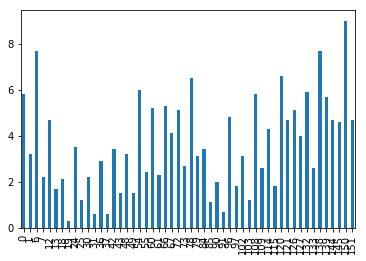

In [171]:
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "15-24", "value"].plot(kind='bar');

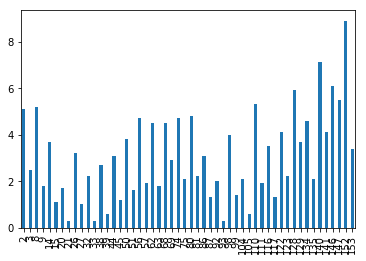

In [173]:
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "25-49", "value"].plot(kind='bar');

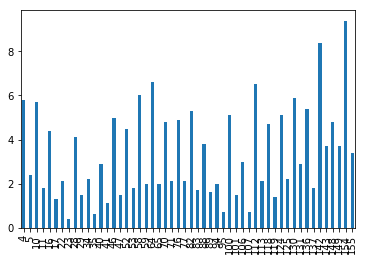

In [174]:
ch_nationality_age_data.loc[ch_nationality_age_data["age_category"] == "50+", "value"].plot(kind='bar');

# 4

We downloaded a dataset from Amstat website in .xlsx format, which contains total number of employment and unemployment ratio per canton. We know that Switzerland defines unemployment ratio as ratio of unmployed people divided by active population. Thus, knowing unemployment ratio and total number of unemloyed people, one can easily calculate active population. After finding active population in each canton, categorizing cantons by Röstigraben, and finding total number of unemployed people and total number of active population in each region of Röstigraben, one can achieve unemployment ratio in each Röstigraben regions.

Load data.

In [192]:
ch_q4 = pd.read_excel("ch_q4.xlsx", skiprows=4, header=None, usecols=np.array([0,2,3]))

Show sample of data using head().

In [193]:
ch_q4.head()

,0,2,3
0,Zürich,3.3,27225
1,Bern,2.4,13658
2,Luzern,1.7,3885
3,Uri,0.6,112
4,Schwyz,1.7,1455


Show columns and datatypes.

In [194]:
ch_q4.dtypes

0     object
2    float64
3      int64
dtype: object

Unique values in each column.

In [195]:
for i in ch_q4.columns:
    print("For column {}".format(i))
    print(ch_q4[i].unique())

For column 0
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']
For column 2
[ 3.3  2.4  1.7  0.6  0.7  1.   1.8  2.3  2.7  2.6  3.5  2.8  3.   2.2  1.1
  2.9  2.   3.1  4.3  5.1  5.2  4.4]
For column 3
[ 27225  13658   3885    112   1455    153    248    416   1543   4466
   3801   3455   4082   1286    523     62   6127   1166  10684   3058
   5202  17155   4816   4738  12234   1619 133169]


Data cleaning steps:

Rename columns to meaningful names ("canton", "ratio", "total").

There is no canton named "Gesamt", it means "Total" in German, drop that row.

Calculate active population for each canton by following formula, 100 * total / ratio.

In [196]:
ch_q4.rename(columns={0:"canton", 2:"ratio", 3:"total"}, inplace=True)
ch_q4 = ch_q4[ch_q4["canton"] != "Gesamt"]
ch_q4["active_population"] = 100 * ch_q4["total"] / ch_q4["ratio"]

Show sample of data using head().

In [197]:
ch_q4.head()

,canton,ratio,total,active_population
0,Zürich,3.3,27225,825000.000000
1,Bern,2.4,13658,569083.333333
2,Luzern,1.7,3885,228529.411765
3,Uri,0.6,112,18666.666667
4,Schwyz,1.7,1455,85588.235294


Cantons are listed by languages they speak, only "Graubünden" is contained in multiple lists as it is the only canton which is not dominated by a single language and the only canton where Romansh is spoken significantly.

In [215]:
ge_speaking_cantons = ['Zürich', 'Bern', 'Luzern', 'Uri', 'Schwyz', 'Obwalden', 'Nidwalden', 'Glarus', 'Zug', 'Solothurn', 'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen', 'Graubünden', 'Aargau', 'Thurgau']
fr_speaking_cantons =  ['Freiburg', 'Genf', 'Jura', 'Neuenburg', 'Waadt', 'Wallis']
it_speaking_cantons =  ['Tessin']
ro_speaking_cantons = ['Graubünden']

Divide dataframe according to languages spoken in cantons.

In [216]:
ch_q4_ge = ch_q4.loc[ch_q4["canton"].isin(ge_speaking_cantons)]
ch_q4_fr = ch_q4.loc[ch_q4["canton"].isin(fr_speaking_cantons)]
ch_q4_it = ch_q4.loc[ch_q4["canton"].isin(it_speaking_cantons)]
ch_q4_ro = ch_q4.loc[ch_q4["canton"].isin(ro_speaking_cantons)]

In [223]:
print("Unemployment rate in German speaking cantons is {0:.2f} percent".format(ch_q4_ge["total"].sum() / ch_q4_ge["active_population"].sum() * 100))
print("Unemployment rate in French speaking cantons is {0:.2f} percent".format(ch_q4_fr["total"].sum() / ch_q4_fr["active_population"].sum() * 100))
print("Unemployment rate in Italian speaking cantons is {0:.2f} percent".format(ch_q4_it["total"].sum() / ch_q4_it["active_population"].sum() * 100))
print("Unemployment rate in Romansh speaking cantons is {0:.2f} percent".format(ch_q4_ro["total"].sum() / ch_q4_ro["active_population"].sum() * 100))

Unemployment rate in German speaking cantons is 2.56 percent
Unemployment rate in French speaking cantons is 4.09 percent
Unemployment rate in Italian speaking cantons is 3.10 percent
Unemployment rate in Romansh speaking cantons is 1.10 percent
